(test-functions:portfolio-3d)=
# Simple Portfolio Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The simple portfolio model (or `Portfolio3D` for short ) is a three-dimensional
scalar-valued test function.
The function was introduced in {cite}`Saltelli2004` as an example for
illustrating some elementary sensitivity measures.

## Test function instance

To create a default instance of the simple portfolio model:

In [2]:
my_testfun = uqtf.Portfolio3D()

Check if it has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : Portfolio3D
Spatial dimension : 3
Description       : Simple portfolio model from Saltelli et al. (2004)


## Description

The simple portfolio model computes the estimated risk (_return_) in &#8364;
of an investment portfolio consisting of three hedged portfolios via 
a linear relationship[^location]:

$$
\mathcal{M}(\boldsymbol{x}) = C_s P_s + C_t P_t + C_j P_j,
$$

where $\boldsymbol{x} = \{ P_s, P_t, P_j \}$ is the vector of hedged portfolios
values in &#8364; and $\boldsymbol{p} = \{ C_s, C_t, C_j \}$ is the vector of
quantities per hedged portfolio.
$\boldsymbol{x}$ is assumed to be random variables further defined below.

## Probabilistic input

Based on {cite}`Saltelli2004`, the probabilistic input model for the simple
portfolio model consists of three independent normal random variables with the
distribution parameters shown in the table below.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=3, marginals=(UnivDist(distribution='normal', parameters=array([0., 4.]), name='Ps', description="Hedged portfolio 's' [€]"), UnivDist(distribution='normal', parameters=array([0., 2.]), name='Pt', description="Hedged portfolio 't' [€]"), UnivDist(distribution='normal', parameters=array([0., 1.]), name='Pj', description="Hedged portfolio 'j' [€]")), copulas=None, name='Portfolio3D-Saltelli2004', description='Probabilistic input model for the simple portfolio model from Saltelli et al. (2004).')

## Parameters

The parameters of the simple portfolio model are the quantities of each 
of the hedged portfolios. The available values taken from {cite}`Saltelli2004`
are shown in the table below

```{table} Parameters of the simple portfolio model
:name: portfolio-3d-parameters

| No. |                 Value                  |         Keyword           |             Source              |
|:---:|:--------------------------------------:|:-------------------------:|:-------------------------------:|
|  1  | $C_s = 100$, $C_t = 500$, $C_j = 1000$ | `Saltelli2004a` (default) | Table 1.1 {cite}`Saltelli2004`  |
|  2  | $C_s = 300$, $C_t = 300$, $C_j = 300$  |      `Saltelli2004b`      | Table 1.1 {cite}`Saltelli2004`  |
|  3  | $C_s = 500$, $C_t = 400$, $C_j = 100$  |      `Saltelli2004c`      | Table 1.1 {cite}`Saltelli2004`  |
```

To create an instance of the simple portfolio model with a different set of
parameter values from the selection above, type:

```python
my_testfun = uqtf.Portfolio3D(parameters_selection="Saltelli2004")
```

## Reference results

This section provides several reference results of typical UQ analyses
involving the test function.

### Sample histogram

Shown below are the histograms of the output based on $100'000$ random points
for the simple portfolio model with three different sets of parameters.

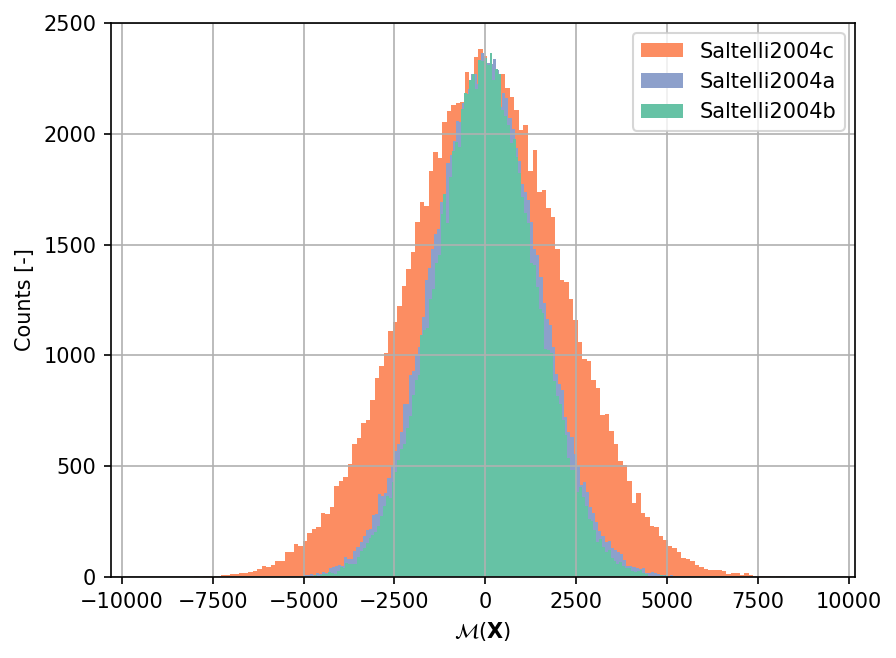

In [5]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test_1 = my_testfun(xx_test)
my_testfun_2 = uqtf.Portfolio3D(parameters_selection="Saltelli2004b")
yy_test_2 = my_testfun_2(xx_test)
my_testfun_3 = uqtf.Portfolio3D(parameters_selection="Saltelli2004c")
yy_test_3 = my_testfun_3(xx_test)

plt.hist(yy_test_3, bins="auto", color="#fc8d62", label="Saltelli2004c")
plt.hist(yy_test_1, bins="auto", color="#8da0cb", label="Saltelli2004a")
plt.hist(yy_test_2, bins="auto", color="#66c2a5", label="Saltelli2004b")
plt.grid()
plt.ylabel("Counts [-]")
plt.xlabel("$\mathcal{M}(\mathbf{X})$")
plt.legend();

plt.gcf().set_dpi(150);

### Moments

Based on the model structure as well as the assumption on the uncertain
input variables, the output of the simple portfolio model is normally
distributed. The moments are available analytically.

The mean reads:

$$
\bar{Y} = C_s \bar{p}_s + C_t \bar{p}_t + C_j \bar{p}_j,
$$

where $\bar{p}_s$,  $\bar{p}_t$, and $\bar{p}_j$ are the means of
the three hedged portfolios, respectively.

The standard deviation reads:

$$
\sigma_Y = \left( C^2_s \sigma^2_s + C^2_t \sigma^2_t + C^2_j \sigma^2_j \right)^{0.5},
$$

where $\sigma_s$,  $\sigma_t$, and $\sigma_j$ are the standard deviations of
the three hedged portfolios, respectively.

The analytical values of the mean and standard deviation of the model output
for the three sets of parameters are shown in the table below.

```{table} Analytical mean and standard deviation of the simple portfolio model
:name: portfolio-3d-mean-std

| No. |    Parameter    | $\bar{Y}$ |         $\sigma_Y$         |
|:---:|:---------------:|:---------:|:--------------------------:|
|  1  | `Saltelli2004a` |   $0.0$   | $1.4696938457 \times 10^3$ |
|  2  | `Saltelli2004b` |   $0.0$   | $1.3747727085 \times 10^3$ |
|  3  | `Saltelli2004c` |   $0.0$   | $2.1563858653 \times 10^3$ |
```

### Sensitivity analysis

In {cite}`Saltelli2004`, the simple portfolio model was used as an illustrating
example of several model sensitivity measures. Due to the simple nature of
the model (linear, monotonic), simple local or hybrid local-global sensitivity
measures are deemed sufficient to characterize the model sensitivity.

Local sensitivity measure based derivative is given by:

$$
S^d_x = \frac{\partial Y}{\partial P_x} = C_x; \;\; x = s, t, j.
$$

This measure is dimensioned, but it happens that the dimension cancels out
because the input $P_x$ and the output $Y$ have the same unit.
The table below provides the analytical values of the local sensitivity measure
for the three set of parameters.

```{table} Analytical sensitivity measure value $S^d_x$ of the simple portfolio model
:name: portfolio-3d-local-measure

|    Parameter    |  $P_s$  | $P_t$ |  $P_j$  |
|:---------------:|:-------:|:-----:|:-------:|
| `saltelli2004a` |  $100$  | $500$ | $1'000$ |
| `saltelli2004b` |  $300$  | $300$ |  $300$  |
| `saltelli2004c` |  $500$  | $400$ |  $100$  |
```

To include the uncertainty of the input variables in the sensitivity measure,
the local measure defined above is normalized by the standard deviation of both
the input and the output. The hybrid local-global measure now reads:

$$
S^{\sigma}_x = \frac{\sigma_x}{\sigma_Y} \frac{\partial Y}{\partial P_x} = \frac{\sigma_x}{\sigma_Y} C_x; \;\; x = s, t, j.
$$

The table below provides the analytical values of the sensitivity measure
for the three different sets of parameters.

```{table} Analytical sensitivity measure value $S^{\sigma}_x$ of the simple portfolio model
:name: portfolio-3d-hybrid-measure

|    Parameter    |  $P_s$  |  $P_t$  |  $P_j$  |
|:---------------:|:-------:|:-------:|:-------:|
| `saltelli2004a` | $0.272$ | $0.680$ | $0.680$ |
| `saltelli2004b` | $0.873$ | $0.436$ | $0.218$ |
| `saltelli2004c` | $0.928$ | $0.371$ | $0.046$ |
```

The measure $S^{\sigma}_x$ has the following relation:

$$
1.0 = (S^{\sigma}_s)^2 + (S^{\sigma}_t)^2 + (S^{\sigma}_j)^2.
$$

The relation implies that the main-effect Sobol' sensitivity indices are
the squared of the hybrid local-global measures.

```{table} Main-effect Sobol' sensitivity indices of the simple portfolio model
:name: portfolio-3d-hybrid-measure

|    Parameter    |   $P_s$   |  $P_t$   |   $P_j$   |
|:---------------:|:---------:|:--------:|:---------:|
| `saltelli2004a` |  $0.074$  | $0.4624$ | $0.4624$  |
| `saltelli2004b` |  $0.762$  | $0.1900$ | $0.0475$  |
| `saltelli2004c` |  $0.861$  | $0.1376$ | $0.0021$  |
```

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^location]: see Section 1.1, pp. 1-2 in {cite}`Saltelli2004`.